In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.spatial.distance import correlation
from sympy.core.multidimensional import structure_copy
from ydata_profiling import ProfileReport
from ydata_profiling.visualisation.plot import correlation_matrix

# Set color palette
sns.set_palette("Set2")

#ignore warning
import warnings
warnings.filterwarnings("ignore")


data = pd.read_csv('data/GlobalWeatherRepository.csv')
data.head()





,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [2]:
# Summary Statistics
data.describe()



,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,47552.000000,47552.000000,4.755200e+04,47552.000000,47552.000000,47552.000000,47552.000000,47552.000000,47552.000000,47552.000000,...,47552.000000,47552.000000,47552.000000,47552.000000,47552.000000,47552.000000,47552.000000,47552.000000,47552.000000,47552.000000
mean,19.142719,22.208518,1.726444e+09,23.192991,73.748797,8.298370,13.358912,171.215953,1013.667459,29.932993,...,19.323696,513.077997,62.795489,13.802165,10.407309,23.152051,45.499727,1.637029,2.475690,49.252061
std,24.481879,65.784958,6.162567e+06,9.051689,16.292992,9.962995,16.032730,103.131032,7.035737,0.207658,...,17.705659,996.645508,37.954786,25.555830,52.212494,45.715040,137.600267,0.951950,2.440156,35.125698
min,-41.300000,-175.200000,1.715849e+09,-24.800000,-12.600000,2.200000,3.600000,1.000000,971.000000,28.670000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.185000,0.185000,1.000000,1.000000,0.000000
25%,3.750000,-6.250000,1.721048e+09,18.400000,65.100000,4.000000,6.500000,83.000000,1010.000000,29.830000,...,10.800000,217.000000,37.000000,0.800000,0.700000,4.600000,7.585000,1.000000,1.000000,15.000000
50%,17.250000,23.320000,1.726484e+09,25.400000,77.600000,6.900000,11.200000,164.000000,1013.000000,29.910000,...,17.000000,308.950000,59.000000,2.960000,2.035000,11.655000,18.362000,1.000000,1.000000,49.000000
75%,40.400000,50.580000,1.731747e+09,29.000000,84.200000,11.600000,18.700000,259.000000,1017.000000,30.030000,...,25.800000,471.750000,83.700000,13.875000,7.600000,25.900000,41.440000,2.000000,3.000000,83.000000
max,64.150000,179.220000,1.737025e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,1080.000000,31.890000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,5858.020000,6.000000,10.000000,100.000000


In [3]:
# dataset structure
print(f'Dataset info: {data.info()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47552 entries, 0 to 47551
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       47552 non-null  object 
 1   location_name                 47552 non-null  object 
 2   latitude                      47552 non-null  float64
 3   longitude                     47552 non-null  float64
 4   timezone                      47552 non-null  object 
 5   last_updated_epoch            47552 non-null  int64  
 6   last_updated                  47552 non-null  object 
 7   temperature_celsius           47552 non-null  float64
 8   temperature_fahrenheit        47552 non-null  float64
 9   condition_text                47552 non-null  object 
 10  wind_mph                      47552 non-null  float64
 11  wind_kph                      47552 non-null  float64
 12  wind_degree                   47552 non-null  int64  
 13  w

In [4]:
# Check the number of numeric and categorical columns count
numeric_columns_count = data.select_dtypes(include='number').shape[1]

# Count categorical columns
categorical_columns_count =data.select_dtypes(include='object').shape[1]

# Display the counts
print(f'Number of numeric columns: {numeric_columns_count}')
print(f'Number of categorical columns: {categorical_columns_count}')

# Check the shape of the datase
print(f'shape of the Dataset is {data.shape}')


Number of numeric columns: 30
Number of categorical columns: 11
shape of the Dataset is (47552, 41)


# Profiling

In [5]:
# # It is too big to show in the github
# data.profile_report()

# Step 1 Data Cleaning and Preprocessing

In [6]:
# Check for NaN values in the Dataset
missing_value = data.isnull().sum()
print(f'Missing values: {missing_value}')

missing_values = data.isnull().sum().sum()



# Check if there are any missing values and print the result using an f-string
if missing_values > 0:
    print(f"Missing values are present. Total missing values: {missing_values}")
else:
    print("No missing values in the dataset.")

Missing values: country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               

In [7]:
# Check the Duplicates
duplicates_count = data.duplicated().sum()

# Check if there are any duplicate rows and print the result using f-strings
if data.duplicated().any():
    print(f"Duplicate entries found. Total duplicate rows: {duplicates_count}")
else:
    print("No duplicate entries in the dataset.")

No duplicate entries in the dataset.


In [8]:
# Standardize Country Names and Displaying Unique values

# Check Unique Country Names
unique_countries = data['country'].unique()
numOfUniqueCountries = data['country'].nunique()
print(f'Number of Uniquer countries', numOfUniqueCountries)
print(unique_countries)


Number of Uniquer countries 210
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Madagascar' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Swaziland' 'Ethiopia' 'Fiji Islands' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Vatican City'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' '

In [9]:
# Strip leading/trailing spaces and capitalize correctly
# Strip leading/trailing spaces and capitalize correctly
data['country'] = data['country'].str.strip().str.title()

country_mapping = {
    'USA United States of America': 'United States of America',
    "Lao People's Democratic Republic": 'Laos',
    'Malásia': 'Malaysia',
    'Komoren': 'Comoros',
    'كولومبيا': 'Colombia',
    'Estonie': 'Estonia',
    'Гватемала': 'Guatemala',
    'Inde': 'India',
    'Letonia': 'Latvia',
    'Польша': 'Poland',
    'Mexique': 'Mexico',
    'Polônia': 'Poland',
    'Marrocos': 'Morocco',
    'Турция': 'Turkey',
    'Saint-Vincent-et-les-Grenadines': 'Saint Vincent and the Grenadines',
    'Saudi Arabien': 'Saudi Arabia',
    'Südkorea': 'South Korea',
    'Bélgica': 'Belgium',
    'Turkménistan': 'Turkmenistan',
    '火鸡': 'Turkey',
    'Jemen': 'Yemen'
}

# Apply the mapping
data['country'] = data['country'].replace(country_mapping)


In [10]:
# Check Unique Country Names
unique_countries = data['country'].unique()
numOfUniqueCountries = data['country'].nunique()
print(f'Number of Uniquer countries', numOfUniqueCountries)
print(unique_countries)


Number of Uniquer countries 192
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua And Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia And Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Madagascar' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Democratic Republic Of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Swaziland' 'Ethiopia' 'Fiji Islands' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Vatican City'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' '

# Step 2 Exploratory Data Analysis (EDA)


In [11]:
%matplotlib inline

# dubug
# print(data.columns)
# print('last_updated' in data.columns)  # Should return True

# Average
# data['last_updated'] = pd.to_datetime(data['last_updated'])  # Ensure datetime format
# data.set_index('last_updated', inplace=True)
# data.resample('D')['temperature_celsius'].mean().plot(title='Daily Average Temperature', figsize=(10, 6))




We aim to identify the key features that contribute to temperature_celsius, precip_mm, humidity, and cloud in order to uncover underlying trends in weather patterns.

In [12]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for celsius
target_corr = numeric_data.corr()['temperature_celsius'].sort_values(ascending=False)
print(target_corr)


temperature_celsius             1.000000
temperature_fahrenheit          0.999996
feels_like_celsius              0.977221
feels_like_fahrenheit           0.977216
uv_index                        0.564254
air_quality_Ozone               0.317591
longitude                       0.103945
visibility_miles                0.090481
visibility_km                   0.087385
gust_kph                        0.071403
gust_mph                        0.071376
wind_mph                        0.056884
wind_kph                        0.056825
air_quality_PM10                0.037575
precip_in                       0.002379
precip_mm                       0.001989
moon_illumination              -0.010140
air_quality_gb-defra-index     -0.034620
wind_degree                    -0.042054
air_quality_us-epa-index       -0.042970
air_quality_Sulphur_dioxide    -0.063500
air_quality_PM2.5              -0.065430
air_quality_Carbon_Monoxide    -0.079958
cloud                          -0.199666
air_quality_Nitr

In [13]:
# Compute the correlation matrix for precip_mm
target_corr = numeric_data.corr()['precip_mm'].sort_values(ascending=False)
print(target_corr)


precip_mm                       1.000000
precip_in                       0.998339
cloud                           0.219217
humidity                        0.185924
longitude                       0.047221
gust_mph                        0.040059
gust_kph                        0.040046
feels_like_celsius              0.032814
feels_like_fahrenheit           0.032813
air_quality_Carbon_Monoxide     0.012893
wind_degree                     0.011405
moon_illumination               0.005823
temperature_fahrenheit          0.002009
temperature_celsius             0.001989
wind_mph                        0.000701
wind_kph                        0.000666
air_quality_Sulphur_dioxide    -0.015585
air_quality_Nitrogen_dioxide   -0.020048
last_updated_epoch             -0.024022
latitude                       -0.035649
air_quality_PM2.5              -0.038153
air_quality_PM10               -0.039037
visibility_km                  -0.051818
air_quality_gb-defra-index     -0.059424
air_quality_us-e

In [14]:
# Compute the correlation matrix for humidity
target_corr = numeric_data.corr()['humidity'].sort_values(ascending=False)
print(target_corr)


humidity                        1.000000
cloud                           0.561402
precip_mm                       0.185924
precip_in                       0.181448
last_updated_epoch              0.127425
pressure_mb                     0.023577
pressure_in                     0.023287
air_quality_Carbon_Monoxide     0.015106
air_quality_Nitrogen_dioxide    0.013005
moon_illumination               0.010023
gust_mph                       -0.004716
gust_kph                       -0.004761
air_quality_Sulphur_dioxide    -0.045076
wind_degree                    -0.045974
wind_kph                       -0.065924
wind_mph                       -0.065946
latitude                       -0.081166
visibility_km                  -0.087369
air_quality_PM2.5              -0.087965
visibility_miles               -0.105607
air_quality_us-epa-index       -0.149874
air_quality_gb-defra-index     -0.150307
longitude                      -0.162241
air_quality_PM10               -0.165498
feels_like_fahre

In [15]:
# Compute the correlation matrix for cloud
target_corr = numeric_data.corr()['cloud'].sort_values(ascending=False)
print(target_corr)


cloud                           1.000000
humidity                        0.561402
precip_mm                       0.219217
precip_in                       0.212633
last_updated_epoch              0.051923
gust_mph                        0.045480
gust_kph                        0.045467
moon_illumination               0.009678
wind_mph                        0.008102
wind_kph                        0.008100
longitude                       0.008018
wind_degree                     0.007676
air_quality_Carbon_Monoxide    -0.032336
pressure_mb                    -0.047412
pressure_in                    -0.047626
latitude                       -0.047675
visibility_km                  -0.059501
air_quality_Sulphur_dioxide    -0.061570
air_quality_Nitrogen_dioxide   -0.066184
visibility_miles               -0.078792
feels_like_fahrenheit          -0.133542
feels_like_celsius             -0.133593
air_quality_PM2.5              -0.134471
air_quality_PM10               -0.142256
air_quality_gb-d

# Hypothesis
Since uv_index and air_quality_Ozone show the most negative correlations with humidity and cloud, and also a mild negative impact on precip_mm, while contributing positively to temperature_celsius, we can propose the following hypotheses:

1. "High UV index is associated with warmer and drier weather."
- This is supported by the strong positive correlation with temperature_celsius and the strong negative correlation with humidity and cloud.2. "Increased ozone levels reduce clud cover and himidity, possibly leaing to clearer skies"

2. "Increased ozone levels reduce cloud cover and humidity, possibly leading to clearer skies."
- This is based on the observed negative correlations between air_quality_Ozone and cloud as well as humidity.

# Data visualization

1. uv_index and temperature_celsius

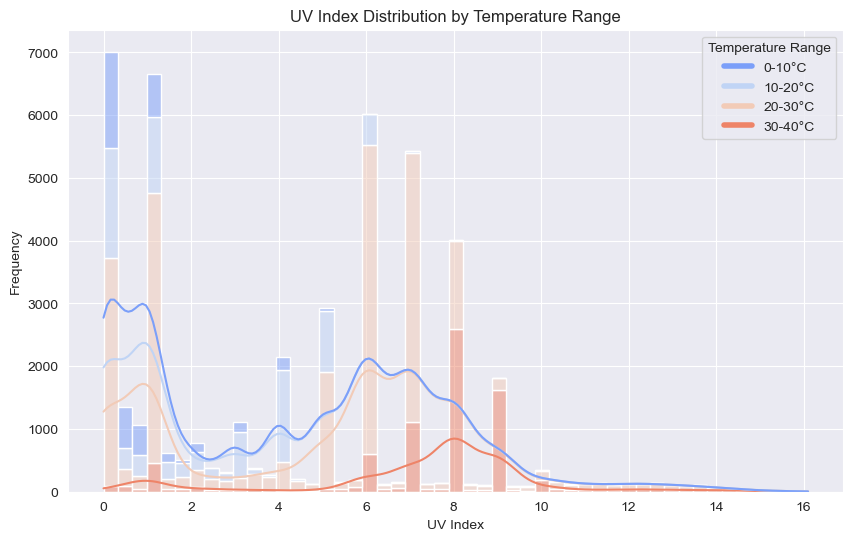

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create bins for temperature ranges
bins = [0, 10, 20, 30, 40]
labels = ['0-10°C', '10-20°C', '20-30°C', '30-40°C']
data['temp_bins'] = pd.cut(data['temperature_celsius'], bins=bins, labels=labels)

# Define the colors for the bins
palette = sns.color_palette('coolwarm', len(labels))

# Plot histogram without automatic legend
# kde, Kernel Density Estimate shows smooth curve
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='uv_index', hue='temp_bins', hue_order=labels, multiple='stack', kde=True, palette=palette)

# Add a manual legend
custom_legend = [plt.Line2D([0], [0], color=color, lw=4) for color in palette]
plt.legend(custom_legend, labels, title='Temperature Range')

# Add title and axis labels
plt.title('UV Index Distribution by Temperature Range')
plt.xlabel('UV Index')
plt.ylabel('Frequency')
plt.show()

'''
The graph shows
1. Low UV Index values occur across a wide range of temperatures.
2. Higher UV Index values are more strongly correlated with specific temperature ranges particularly warmer temperatures.
'''


2. air_quality_Ozone and humidity

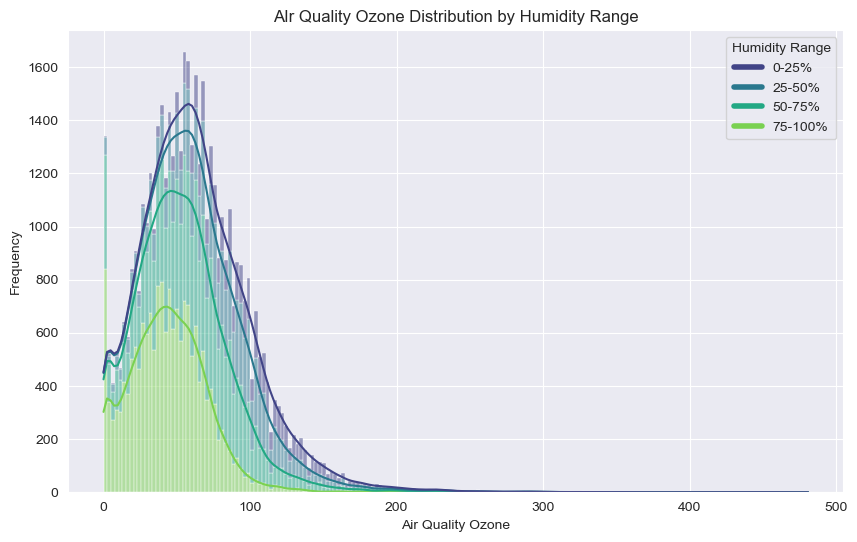

In [26]:
# Define ins and lables for humidity
bins = [0, 25, 50, 75, 100]
labels = ['0-25%', '25-50%', '50-75%', '75-100%']
data['humidity_bins'] = pd.cut(data['humidity'], bins=bins, labels=labels)

# Define the colos for the bins
palette = sns.color_palette('viridis', len(labels))

# Plot histogram without automatic legend
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='air_quality_Ozone', hue='humidity_bins', hue_order=labels, multiple='stack', kde=True, palette=palette)

# Add a manual legend
custom_legend = [plt.Line2D([0],[0], color=color, lw=4) for color in palette]
plt.legend(custom_legend, labels, title='Humidity Range')

# Add title and axis labels
plt.title('AIr Quality Ozone Distribution by Humidity Range')
plt.xlabel('Air Quality Ozone')
plt.ylabel('Frequency')
plt.show()

'''
Observation
1. At Lower ozone Level(<100):
- The frequencies across humidity rangesa are closer together.
- This suggested that lowe ozone levels occur consistely across all humidity ranges.
- Lower ozone levels are more evenly distributed across all humidity ranges.
2. At Higher ozone Level(>100):
- the frequencies show greater varizaion across humidity ranges
- (75%-100%) has noticebly lower frequencies.
- (0-50%) are more dominant at higher ozone levels.
- Higher ozone concentrations tend to occur in low-humidity environments,
'''

# Generate visualizations for temperature and precipitation.
1. Individual Visualizations

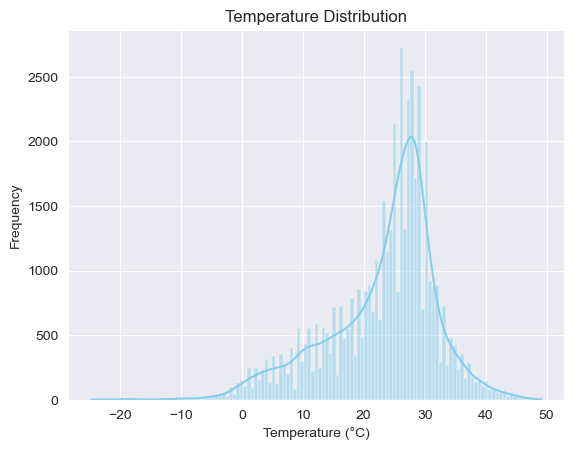

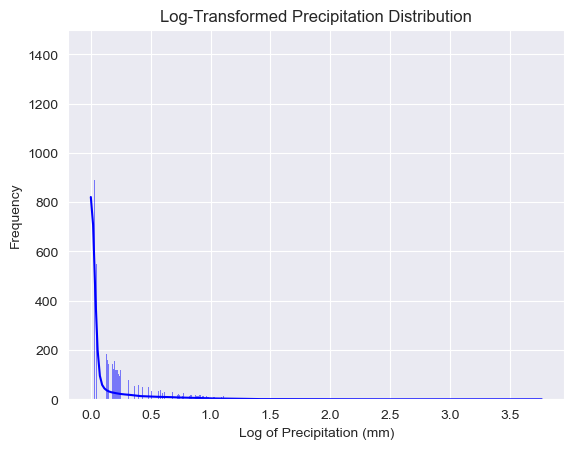

In [39]:
data = pd.read_csv('data/GlobalWeatherRepository.csv')


# Temperature Distribution
sns.histplot(data=data, x='temperature_celsius', kde=True, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Precipitation Distribution
import numpy as np
data['log_precip_mm'] = np.log1p(data['precip_mm'])  # log1p handles log(0) safely
sns.histplot(data=data, x='log_precip_mm', kde=True, color='blue')
plt.title('Log-Transformed Precipitation Distribution')
plt.xlabel('Log of Precipitation (mm)')
plt.ylabel('Frequency')
plt.ylim(0,1000)
plt.show()


2. Relationship Between Temperature and Precipitation

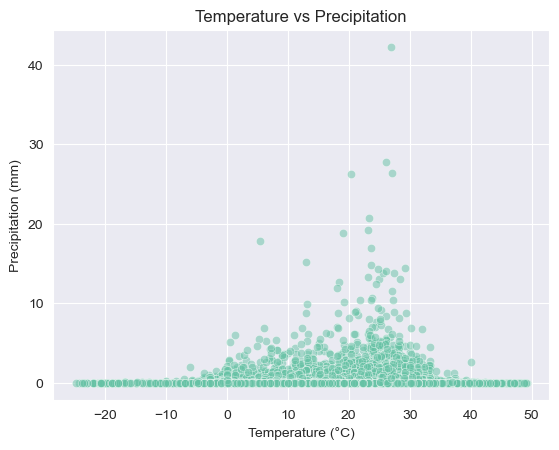

In [28]:
# Scatterplot

sns.scatterplot(data=data, x='temperature_celsius', y='precip_mm', alpha=0.5)
plt.title('Temperature vs Precipitation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.show()



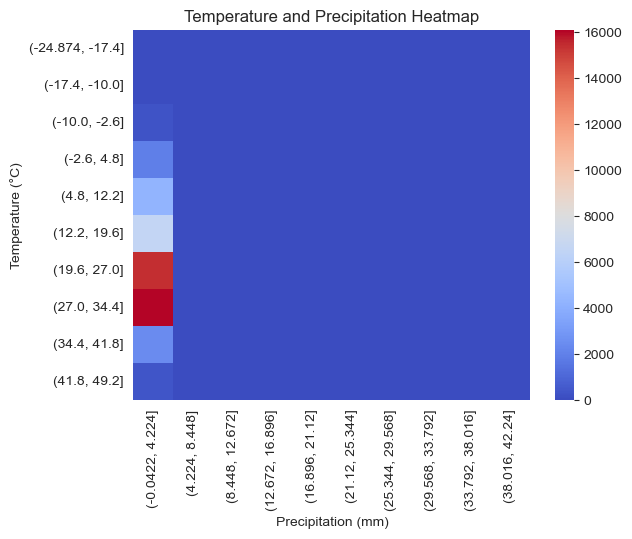

In [36]:
# Heatmap (Binned Visualization)
data['temp_bins'] = pd.cut(data['temperature_celsius'], bins=10)
data['precip_bins'] = pd.cut(data['precip_mm'], bins=10)
heatmap_data = data.groupby(['temp_bins', 'precip_bins']).size().unstack(fill_value=0)

sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Temperature and Precipitation Heatmap')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Temperature (°C)')
plt.show()

3. Explore Seasonal or Time-based Trends

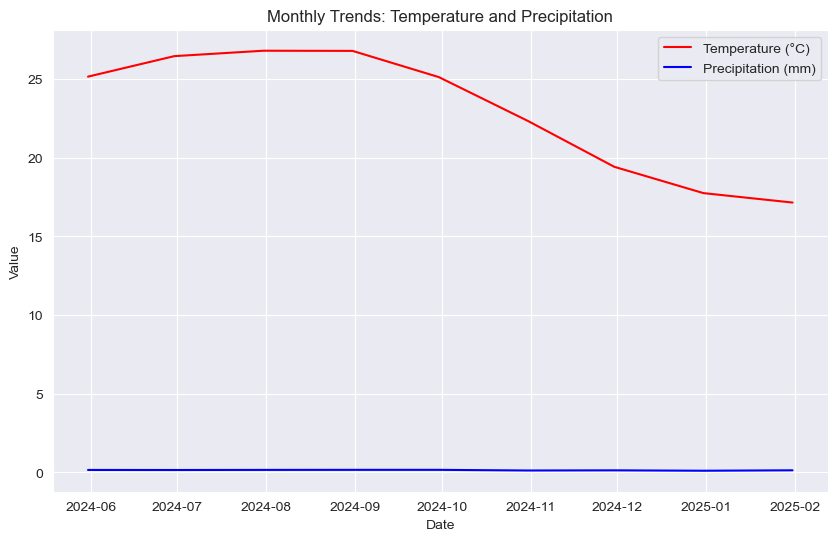

In [37]:
data['date'] = pd.to_datetime(data['last_updated'])  # Ensure datetime column
data.set_index('date', inplace=True)

# Resample for monthly averages
monthly_data = data.resample('M')[['temperature_celsius', 'precip_mm']].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['temperature_celsius'], label='Temperature (°C)', color='red')
plt.plot(monthly_data['precip_mm'], label='Precipitation (mm)', color='blue')
plt.title('Monthly Trends: Temperature and Precipitation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
